In [1]:
from mne.filter import filter_data
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pyedflib
import numpy as np

In [8]:
def readData(filename):
    #Extract data
    f = pyedflib.EdfReader(filename)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    #Get starting time
    startingTime=filename[-19:-4]
    startingTime=pd.to_datetime(startingTime, format='%Y%m%d_%H%M%S', errors='ignore')
    timeStamps=[]
    last=startingTime
    for time in range(f.getNSamples()[0]):
        timeStamps.append(last)
        last=last+pd.Timedelta('40 ms')
    return signal_labels, timeStamps, sigbufs
    f._close()

In [16]:
def extractFeatures(data, timeStamps, sr, windowLength):
    #Filter data between 4 and 8 Hz
    filtData = filter_data(data, sr, 4,8)

    #Extract some sort of feature for all windows and corresponding time stamps
    numSamples=data.shape[1]
    features=np.zeros((data.shape[0],int(numSamples/(windowLength*sr))))
    alignedTimes=[]
    for i,win in enumerate(range(0,numSamples,windowLength*sr)):
        if i<features.shape[1]:
            #Average power per channel
            features[:,i]=np.mean(filtData[:,win:win+windowLength*sr]**2,axis=1)
            #Timestamp at beginning of each window
            alignedTimes.append(timeStamps[win])
    return alignedTimes, features

In [19]:
labels, timeStamps, data = readData("test_data_Maastricht/13337_20180203_094429.bdf")

In [37]:
alignedTimes, features = extractFeatures(data, timeStamps, 25, 60)
dataFrame=pd.DataFrame(features.T,columns=labels)
dataFrame.index=alignedTimes


Setting up band-pass filter from 4 - 8 Hz
fir_design defaults to "firwin2" in 0.15 but will change to "firwin" in 0.16, set it explicitly to avoid this warning.
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 82 samples (3.280 sec) selected


<ipython-input-16-1ed0146448dd>:3: DeprecationWarning: fir_design defaults to "firwin2" in 0.15 but will change to "firwin" in 0.16, set it explicitly to avoid this warning.
  filtData = filter_data(data, sr, 4,8)


In [34]:
dataFrame.describe()

,X,Y,Z,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000,854.000000
mean,0.018329,0.052233,0.029798,0.014096,0.030738,0.021451,1679.918812,954.067037,398.085895
std,0.064760,0.231544,0.077028,0.068806,0.135282,0.113479,10392.378577,6620.337197,2923.135051
min,0.001315,0.000264,0.000221,0.000014,0.000011,0.000015,10.545352,10.631776,10.771185
25%,0.001720,0.000430,0.000352,0.000021,0.000017,0.000026,15.663979,15.286497,16.090390
50%,0.001964,0.000544,0.000419,0.000026,0.000020,0.000034,19.502630,18.618370,19.876916
75%,0.017202,0.036392,0.019653,0.011678,0.020037,0.012051,894.744681,459.610407,136.498995
max,1.502728,5.362913,0.991879,1.588030,2.911256,2.554149,200162.759146,136026.183668,72486.776157


NameError: name 'data' is not defined

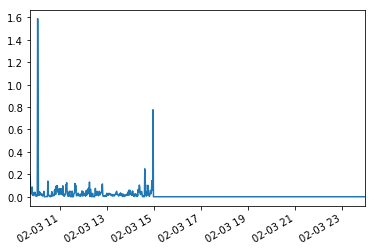

In [38]:
# Visualizing some of our features:
dataFrame['AccX'].plot()